In [2]:
import os
# from sklearn.externals.joblib import Parallel, parallel_backend, register_parallel_backend

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"  
os.environ["CUDA_VISIBLE_DEVICES"] = ""
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from keras import backend as K
import os

# from keras.applications import InceptionResNetV2
import keras   
import numpy as np 
import pandas as pd 
from keras.models import Sequential
from keras import activations,metrics
from keras.preprocessing.image import load_img,img_to_array
from keras.layers import Dense, Dropout,MaxPooling2D,GlobalAveragePooling2D,Conv2D,BatchNormalization,Flatten,Activation
import matplotlib.pyplot as plt
import glob 
from keras.regularizers import l1,l2
from keras.optimizers import SGD
from subprocess import check_output
from keras.callbacks import LearningRateScheduler
from keras import optimizers
from keras import backend as k
from keras.models import Model
import cv2
# with rc[:2].sync_imports():    
import math
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import glob
from keras.utils import np_utils
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score, confusion_matrix
      
from sklearn.metrics import make_scorer
    



C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

## IMPORTING DATASETS / RESCALING DATA

[[[11. 22.  5.]
  [11. 22.  5.]
  [11. 22.  5.]
  ...
  [15. 29.  6.]
  [12. 24.  4.]
  [15. 24.  5.]]

 [[11. 22.  5.]
  [11. 22.  5.]
  [11. 22.  5.]
  ...
  [17. 29.  7.]
  [16. 25.  6.]
  [17. 26.  5.]]

 [[11. 22.  5.]
  [11. 22.  5.]
  [10. 23.  5.]
  ...
  [20. 30.  6.]
  [19. 29.  5.]
  [18. 28.  4.]]

 ...

 [[11. 52. 70.]
  [10. 53. 70.]
  [10. 53. 72.]
  ...
  [18. 27. 10.]
  [16. 25.  8.]
  [15. 24.  7.]]

 [[12. 53. 71.]
  [11. 52. 70.]
  [10. 53. 70.]
  ...
  [15. 23.  8.]
  [12. 20.  5.]
  [15. 24.  7.]]

 [[11. 52. 72.]
  [11. 52. 72.]
  [11. 52. 70.]
  ...
  [12. 20.  5.]
  [15. 21.  7.]
  [18. 25.  9.]]]
(1, 1080, 2340, 3)


AttributeError: module 'keras.utils' has no attribute 'to_categorical'

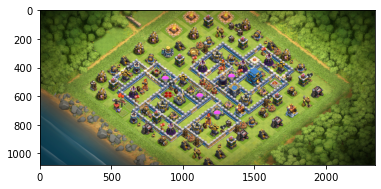

In [6]:
img = load_img('clash_data/train/train/TownHall_12/Farm/Attacked/Townhall-12-Base-Layout-Nov19-20191115-161356.jpg')
plt.imshow(img)
x = img_to_array(img)
print(x)
x = x.reshape((1,) + x.shape)
print(x.shape)
y = keras.utils.to_categorical(x)
display(y.shape)

In [3]:
import cv2
print('<OPTIONIAL--BASIC EDGE DETECTOR USING OPEN-CV>')

# Read the image
# image = cv2.imread('340px-DNA_Structure+Key+Labelled.pn_NoBB.png')
image= cv2.imread('clash_data/train/train/TownHall_12/Farm/Attacked/Townhall-12-Base-Layout-Nov19-20191115-161356.jpg')

# convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# blur it
blurred_image = cv2.GaussianBlur(gray_image, (7, 7), 0)

# Show both our images
cv2.imshow("Original image", image)
cv2.imshow("Blurred image", blurred_image) 

# Run the Canny edge detector
canny = cv2.Canny(blurred_image, 50, 8)
cv2.imshow("Canny", canny)



im, contours, hierarchy= cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print("Number of objects found = ", len(contours))
print('press "esc" to exit to properly exit out the image window ')


cv2.drawContours(image, contours, -1, (0,255,0), 200) #255,0,255... 255,255,255.... etc .  <(^^)>
cv2.imshow("objects Found", image)
cv2.waitKey()

<OPTIONIAL--BASIC EDGE DETECTOR USING OPEN-CV>
Number of objects found =  12362
press "esc" to exit to properly exit out the image window 


113

In [6]:
from keras.preprocessing import image
import glob
import numpy as np 
img_paths = glob.glob("clash_data/train/train/TownHall_13/farm/Attacked/*.jpg")

def path_to_tensor(img_path):
    img = image.load_img(img_path, target_size=(255, 255))
    x = image.img_to_array(img)
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in img_paths]
    return np.vstack(list_of_tensors)

img_input = paths_to_tensor(img_paths)



print('image shape: #images->{}, Height->{}, Width->{}, #Channels->{}'\
      .format(img_input.shape[0],img_input.shape[1],img_input.shape[2],img_input.shape[3]))

image shape: #images->18, Height->255, Width->255, #Channels->3


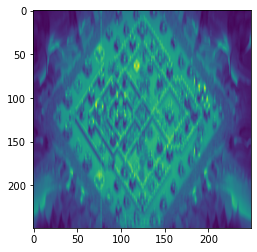

In [11]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
data = np.array([img_input], dtype=np.float32)
filters = np.zeros(shape=(7,7,3,9), dtype=np.float32)
filters[:,3,:,0] = 1
filters[3,:,:,1] = 1


X1=tf.placeholder(tf.float32, shape=(18,255,255,3),name='X')

conv1=tf.nn.conv2d(X1,filters,strides=[1,1,1,1], padding='VALID')
relu = tf.nn.relu(conv1)

with tf.Session() as sess:
    output = sess.run(relu, feed_dict={X1:img_input})
plt.imshow(output[5,:,:,0])
plt.show()


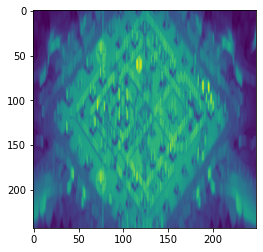

In [12]:
max_pool = tf.nn.max_pool(relu,ksize=[1,7,1,1],strides=[1,1,1,1],padding='VALID')
with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X1:img_input})
plt.imshow(output[5,:,:,0])
plt.show()


## RESIDUAL GLOBAL AVERAGE POOLING
### BASELINE MODEL

In [3]:
batch_size = 7
import keras
train_gen = keras.preprocessing.image.ImageDataGenerator(rotation_range=3,
                                                        width_shift_range=0.0025,
                                                        height_shift_range=0.025,
                                                        shear_range=0.01,
                                                        zoom_range=0.025,
                                                        channel_shift_range=0.0,
                                                        fill_mode="nearest",
                                                        cval=0.0,
                                                        horizontal_flip=True,
                                                        vertical_flip=True,
                                                        rescale= 1./255,
                                                        )

valid_gen = keras.preprocessing.image.ImageDataGenerator(rotation_range=45,
                                                        width_shift_range=0.005,
                                                        height_shift_range=0.015,
                                                        shear_range=0.09,
                                                        zoom_range=0.145,
                                                        channel_shift_range=0.0,
                                                        fill_mode="constant",
                                                        cval=0.0,
                                                        horizontal_flip=True,
                                                        vertical_flip=True,
                                                        rescale= 1./255,)

test_gen = keras.preprocessing.image.ImageDataGenerator(samplewise_std_normalization=False,
                                                        rotation_range=90,
                                                        width_shift_range=0.0045,
                                                        height_shift_range=0.015,
                                                        shear_range=0.02,
                                                        zoom_range=0.2400,
                                                        channel_shift_range=0.0,
                                                        fill_mode="constant",
                                                        cval=0.0,
                                                        horizontal_flip=True,
                                                        vertical_flip=True,
                                                        rescale= 1./255,)

train_generator = train_gen.flow_from_directory('clash_data/train/train/', shuffle=True, 
        target_size=(255,255),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='categorical')


test_generator = test_gen.flow_from_directory('clash_data/test/test/',shuffle=True,
        target_size=(255,255),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = valid_gen.flow_from_directory('clash_data/validation/validation/',shuffle=True,
        target_size=(255,255),
        batch_size=batch_size,
        class_mode='categorical')

Found 160 images belonging to 11 classes.
Found 427 images belonging to 11 classes.
Found 0 images belonging to 11 classes.


In [4]:
ram = 160*255*255*32 
print('n_bits',ram)
print('RAM NEEDED FOR ONE INSTANCE: 33MB')


n_bits 332928000
RAM NEEDED FOR ONE INSTANCE: 33MB


In [5]:
batchXt, batchyt = train_generator.next() 
# batchXv, batchyv = validation_generator.next() 
batchXte, batchyte = test_generator.next()
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(2,nb_row=4, nb_col=4,input_shape = (255, 255, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2 )))
classifier.add(Conv2D(2,nb_row=4, nb_col=4, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (7, 7)))
classifier.add(GlobalAveragePooling2D())
# classifier.add(Dropout(0.3))
# Step 4 - Full connection
classifier.add(Dense(11, activation = 'softmax'))
classifier.summary()
callbacks = [tf.keras.callbacks.TensorBoard(log_dir="logs")]
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['categorical_accuracy','mean_squared_error'])
classifier.fit_generator(train_generator,
                         callbacks=callbacks,
                         samples_per_epoch=6,
                         nb_epoch=125
                            )


Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Colocations handled automatically by placer.


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 252, 252, 2)   98          convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 126, 126, 2)   0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 123, 123, 2)   66          maxpooling2d_1[0][0]             
____________________________________________________________________________________________________
maxpooling2d_2 (MaxPooling2D)    (None, 17, 17, 2)     0           convolution2d_2[0][0]            
___________________________________________________________________________________________

Instructions for updating:
keep_dims is deprecated, use keepdims instead


Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Use tf.cast instead.


Epoch 1/125
7/6 [===================================] - 1s - loss: 2.5489 - categorical_accuracy: 0.0000e+00 - mean_squared_error: 0.0855

C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:1573: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '



Epoch 2/125
7/6 [===================================] - 0s - loss: 2.6971 - categorical_accuracy: 0.0000e+00 - mean_squared_error: 0.0875
Epoch 3/125
7/6 [===================================] - 0s - loss: 2.5983 - categorical_accuracy: 0.0000e+00 - mean_squared_error: 0.0862
Epoch 4/125
7/6 [===================================] - 0s - loss: 2.6260 - categorical_accuracy: 0.0000e+00 - mean_squared_error: 0.0865
Epoch 5/125
7/6 [===================================] - 0s - loss: 2.5838 - categorical_accuracy: 0.0000e+00 - mean_squared_error: 0.0859
Epoch 6/125
7/6 [===================================] - 0s - loss: 2.5718 - categorical_accuracy: 0.0000e+00 - mean_squared_error: 0.0856
Epoch 7/125
7/6 [===================================] - 1s - loss: 2.5264 - categorical_accuracy: 0.0000e+00 - mean_squared_error: 0.0850
Epoch 8/125
7/6 [===================================] - 1s - loss: 2.5530 - categorical_accuracy: 0.0000e+00 - mean_squared_error: 0.0853
Epoch 9/125
7/6 [================

7/6 [===================================] - 1s - loss: 2.2836 - categorical_accuracy: 0.0000e+00 - mean_squared_error: 0.0808
Epoch 122/125
7/6 [===================================] - 1s - loss: 2.2882 - categorical_accuracy: 0.0000e+00 - mean_squared_error: 0.0809
Epoch 123/125
7/6 [===================================] - 1s - loss: 2.2694 - categorical_accuracy: 0.2857 - mean_squared_error: 0.0805
Epoch 124/125
7/6 [===================================] - 1s - loss: 2.2815 - categorical_accuracy: 0.2857 - mean_squared_error: 0.0807
Epoch 125/125
7/6 [===================================] - 1s - loss: 2.2799 - categorical_accuracy: 0.0000e+00 - mean_squared_error: 0.0807


In [6]:
loss = classifier.evaluate_generator(test_generator, val_samples=25)
pred = classifier.predict_generator(test_generator, val_samples=7)
# print(loss)
pd.DataFrame(pred)
print('saving model')
classifier.save('clash_baseline_opti.h5')
classifier.save_weights('clash_baseline_weights.h5')
from datetime import date
# print('converting to tflite')
# converter = tf.lite.TFLiteConverter.from_keras_model_file('clash_baseline_opti.h5') # TF 1.x
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
# # converter = tf.lite.TFLiteConverter.from_keras_model(model) # TF 2.x
# tflite_model = converter.convert() 
# tflite_model_file_name = "clash_baseline_opti" + "_" + str(date.today()) + ".tflite"
# open(tflite_model_file_name, "wb").write(tflite_model)

saving model


In [3]:


interpreter = tf.lite.Interpreter(model_path='clash_baseline_opti.h5')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

input_data = np.array([[7]], dtype=np.float32)
interpreter.set_tensor(input_index, input_data)
interpreter.invoke()

print(interpreter.get_tensor(output_index))

ValueError: Model provided has model identifier '

', should be 'TFL3'


In [7]:
pd.DataFrame(pred)

,0,1,2,3,4,5,6,7,8,9,10
0,0.079610,0.099131,0.078730,0.100292,0.106154,0.105106,0.104855,0.079089,0.079656,0.084935,0.082441
1,0.078572,0.097547,0.077543,0.101376,0.107919,0.105925,0.105259,0.078350,0.078727,0.085623,0.083158
2,0.079627,0.099149,0.078752,0.100272,0.106121,0.105087,0.104845,0.079108,0.079673,0.084924,0.082442
3,0.078354,0.097524,0.077223,0.101669,0.108492,0.106339,0.105494,0.077914,0.078475,0.085755,0.082762
4,0.079707,0.099202,0.078859,0.100174,0.105943,0.104970,0.104780,0.079228,0.079757,0.084873,0.082507
5,0.080146,0.099578,0.079431,0.099655,0.105021,0.104397,0.104464,0.079806,0.080203,0.084590,0.082709
6,0.078285,0.096995,0.077242,0.101650,0.108335,0.106059,0.105312,0.078251,0.078492,0.085817,0.083563
